**We are going to complete our project in four steps.**

    1.Creating a model using ML and NLP
    2.Creating a web app using flask and connecting it with model
    3.Commit project to Github
    4.Deploy our model using Heroku


#### Import Required packages

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import nltk  ## Preprocessing our text
from nltk.corpus import stopwords ## removing all the stop words
from nltk.stem.porter import PorterStemmer ## stemming of words

**NLTK:** Natural Language Processing Toolkit is a python library that is used for performing all the NLP tasks like stemming, lemmatizing or removing stopwords, etc.

**Porter Stemmer:** It is a type of stemmer that is used for stemming. stemming is basically a technique of converting a word to its root word.

Ex: learning → learn

The dataset which we are going to use is an open-source dataset available on Kaggle.

Dataset: [Spam-Ham Data](https://www.kaggle.com/venky73/spam-mails-dataset)

**About the dataset**

The dataset contains three columns. The size of the dataset is around 5.65mb. It has around 5000 rows in total.
Columns

**Label:** ham, spam
    
**Text:** a collection of text or emails
    
Label_num: 0 for ham and 1 for spam

**Objective:**
    Our Task is to create a machine learning model that can accurately predict whether an email is a spam or not.

#### Load our dataset into the notebook

In [29]:
df = pd.read_csv("spamhamdata.csv",sep="\t",names=["label","message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA on Dataset

In [30]:
print(df.shape)  ### Return the shape of data 
print(df.ndim)   ### Return the n dimensions of data
print(df.size)   ### Return the size of data 
print(df.isna().sum())  ### Returns the sum fo all na values
print(df.info())  ### Give concise summary of a DataFrame
print(df.head())  ## top 5 rows of the dataframe
print(df.tail()) ## bottom 5 rows of the dataframe

(5572, 2)
2
11144
label      0
message    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
     label                                            message
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name


After running the above code block you will see that we don’t have any null values in our dataset. Also, one thing to notice is that only one column of our has numerical values so we can only visualize that column.

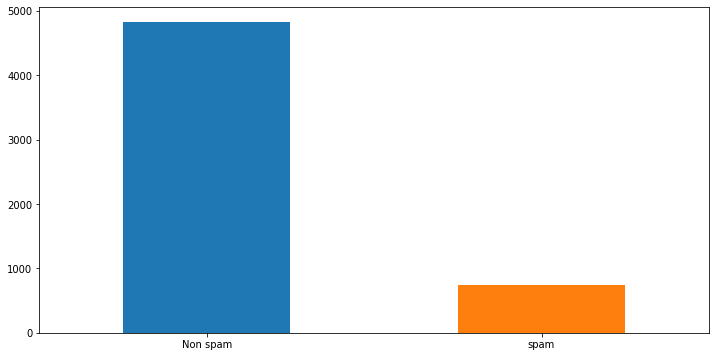

In [31]:
df["label"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

In [32]:
df["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In any NLP problem, the most important step is to clean the text. cleaning text means removing all the punctuation, removing stopwords, performing stemming, lemmatization, and converting the text into vectors.

In [33]:
import re
def clean_text(text):
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = text.replace('\\r', ' ')
    text = text.replace('\\n', ' ')
    text = text.replace('\\"', ' ')
    #text = text.replace('!!!"', ' ')
    text = re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)", ' ', text)
    text = text.lower().strip()
    text = ' '.join(e for e in text.split() if e not in stopwords.words("english"))
    return text

In [34]:
df["message"] = df["message"].apply(clean_text)

In [35]:
df["message"][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [36]:
#Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
df.message=df.message.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()])) # v stands for verb
df.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf live around though


Line 1: we are importing re library, which is used to perform regex in python.<br>
Line 2: Define an empty corpus list, that can be used to store all the text after cleaning.<br>
Line 3: initializing the var length with the length of the data frame.<br>
Line 4: running a loop from 0 to the length of our data frame.<br>
Line 5: Removing all characters except the lower alphabet, bigger alphabets, and digits.<br>
Line 6: Converting the text to lower.<br>
Line7: Splitting the text by spaces.<br>
Line 8: creating an object of porter stemmer.<br>
Line9: Initializing all the stopword in English dictionary to var stopword.<br>
Line 10: Running a loop in the length of the sentence and then for each word in the sentence checking it in stopword and if it does not find in stopword then apply Stemming on to the text and add it to the list.<br>
Line 11: Just concatenating all the words to make a sentence.<br>
Line 12: appending the sentence to the corpus list.<br>
Line 13: Printing the corpus list.<br>
In Cleaning Process the next step is to convert the list of the sentence(corpus) into vectors so that we can feed this data into our machine learning model. for converting the text into vectors we are going to use a bag of words which is going to convert the text into binary form.’

In [37]:
# Features and Labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
x_train.shape

(3733,)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X_train_vec = cv.fit_transform(x_train)

In [41]:
X_test_vec = cv.transform(x_test)

In [42]:
X_train_vec.shape

(3733, 6177)

**Dumping the CV for future use**
For doing predictions of new emails we need to save both our model and count vectorizer.

In [45]:
import pickle ## importing pickle used for dumping models
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [47]:
model.fit(X_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
y_pred=model.predict(X_test_vec)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

we are going to evaluate our model using the confusion matrix and accuracy score.

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[1585    8]
 [  15  231]] 98.74932028276237


#### Saving our model

To save our model we are going to use pickle.

In [51]:
import pickle
pickle.dump(model, open("spam.pkl", "wb"))

In [53]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test_vec)
loaded_model.score(X_test_vec,y_test)

0.9874932028276238

### Prediction for a new email

In [54]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("SPAM")
else :
    print("NOT SPAM")

Enter new review...it's not a good idea of implementing
NOT SPAM


Enter new review...
IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out. 
SPAM
Enter new review...
hi scott, i was wondering you have submitted your project or not
NOT SPAM